In [1]:
from magilearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'  # 设置为黑体，支持中文显示
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 线性回归模型评估

Magilearn 线性回归模型 评估结果：
均方误差 (MSE): 222.0156
平均绝对误差 (MAE): 11.8231
决定系数 (R² Score): 0.9462


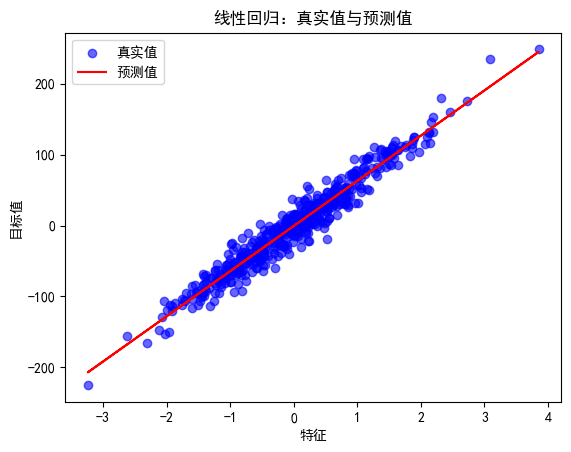

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from magilearn.models import LinearRegression

X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=42)

# 初始化并训练线性回归模型
lr = LinearRegression(learning_rate=0.01, n_iters=1000)
lr.fit(X, y)

# 在训练集上预测
y_pred = lr.predict(X)

# 评估模型
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Magilearn 线性回归模型 评估结果：")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"平均绝对误差 (MAE): {mae:.4f}")
print(f"决定系数 (R² Score): {r2:.4f}")

# 可视化真实值与预测值
plt.scatter(X, y, color='blue', label='真实值', alpha=0.6)  # 添加透明度让散点更明显
plt.plot(X, y_pred, color='red', label='预测值')
plt.title('线性回归：真实值与预测值')
plt.xlabel('特征')
plt.ylabel('目标值')
plt.legend()
plt.show()


- 与sklearn库对比演示

Magilearn Linear Regression - Mean Squared Error: 417.5302
Magilearn Linear Regression - R² Score: 0.3596
Sklearn Linear Regression - Mean Squared Error: 417.5302
Sklearn Linear Regression - R² Score: 0.3596


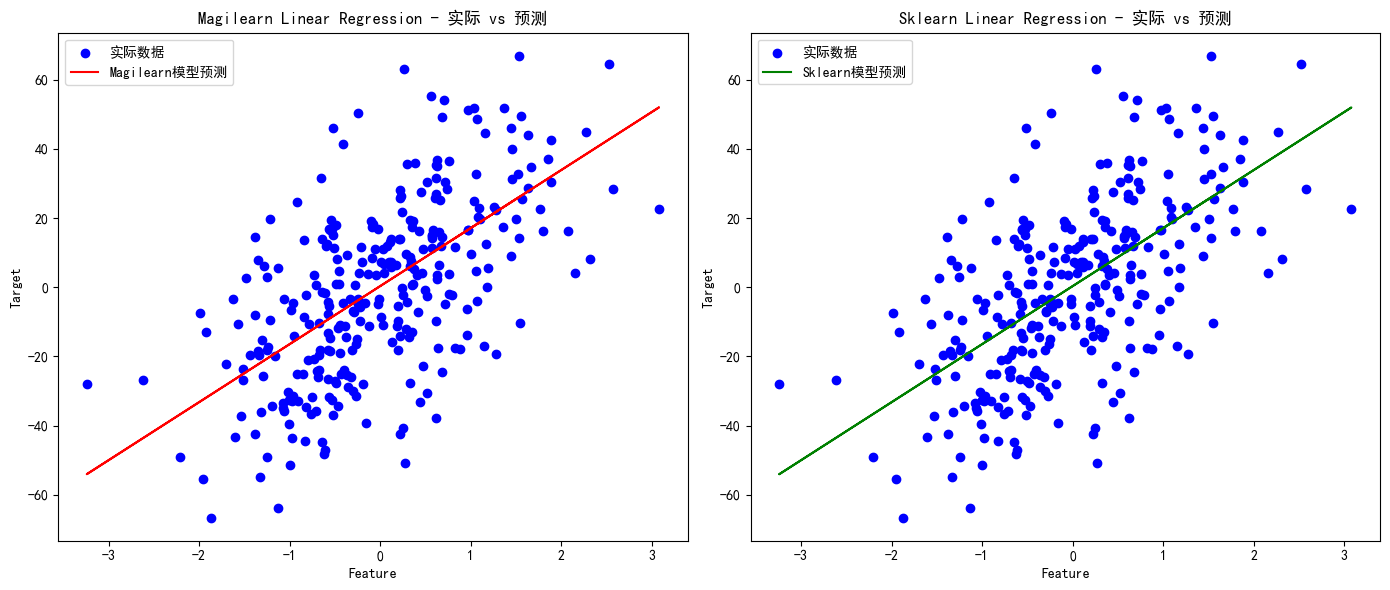

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from magilearn.models import LinearRegression
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

# 生成回归数据集
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Magilearn的线性回归模型
custom_model = LinearRegression(n_iters=10000)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)

# 计算Magilearn模型的均方误差和R²分数
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)

# 初始化sklearn的线性回归模型
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

# 计算sklearn模型的均方误差和R²分数
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

# 输出模型评估指标
print(f"Magilearn Linear Regression - Mean Squared Error: {mse_custom:.4f}")
print(f"Magilearn Linear Regression - R² Score: {r2_custom:.4f}")
print(f"Sklearn Linear Regression - Mean Squared Error: {mse_sklearn:.4f}")
print(f"Sklearn Linear Regression - R² Score: {r2_sklearn:.4f}")

# 可视化对比图
plt.figure(figsize=(14, 6))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制实际数据点与自定义模型的回归线
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='实际数据')
plt.plot(X_test, y_pred_custom, color='red', label='Magilearn模型预测')
plt.title('Magilearn Linear Regression - 实际 vs 预测')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# 绘制实际数据点与sklearn模型的回归线
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='实际数据')
plt.plot(X_test, y_pred_sklearn, color='green', label='Sklearn模型预测')
plt.title('Sklearn Linear Regression - 实际 vs 预测')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

# 逻辑回归模型评估

In [67]:
from magilearn.models import LogisticRegression
from magilearn.datasets import make_classification, train_test_split
from magilearn.metrics import (
    precision_score, recall_score, confusion_matrix, roc_auc_score, accuracy_score
)
import matplotlib.pyplot as plt

# 生成数据
np.random.seed(42)
X = np.random.randn(500, 2)  # 特征数据，500个样本，2个特征
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # 使用简单的线性组合生成二分类标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建并训练逻辑回归模型
lr = LogisticRegression(learning_rate=0.01, num_iterations=1000)
lr.fit(X_train, y_train)

# 预测测试集
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)  # 预测概率，用于 ROC AUC

# 评估模型
accuracy = accuracy_score(y_test, y_pred)  # 准确率
precision = precision_score(y_test, y_pred)  # 精确率
recall = recall_score(y_test, y_pred)  # 召回率
conf_matrix = confusion_matrix(y_test, y_pred)  # 混淆矩阵
roc_auc = roc_auc_score(y_test, y_pred_prob)  # ROC AUC 分数

# 输出评估结果
print(f"Magilearn 逻辑回归模型 评估结果：")
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"混淆矩阵 (Confusion Matrix):\n{conf_matrix}")
print(f"ROC 曲线下的面积 (ROC AUC Score): {roc_auc:.4f}")


Magilearn 逻辑回归模型 评估结果：
准确率 (Accuracy): 0.9800
精确率 (Precision): 1.0000
召回率 (Recall): 0.9565
混淆矩阵 (Confusion Matrix):
[[81  0]
 [ 3 66]]
ROC 曲线下的面积 (ROC AUC Score): 0.9995


- 与sklearn库对比演示

Magilearn Logistic Regression Accuracy: 1.0
Sklearn Logistic Regression Accuracy: 0.99


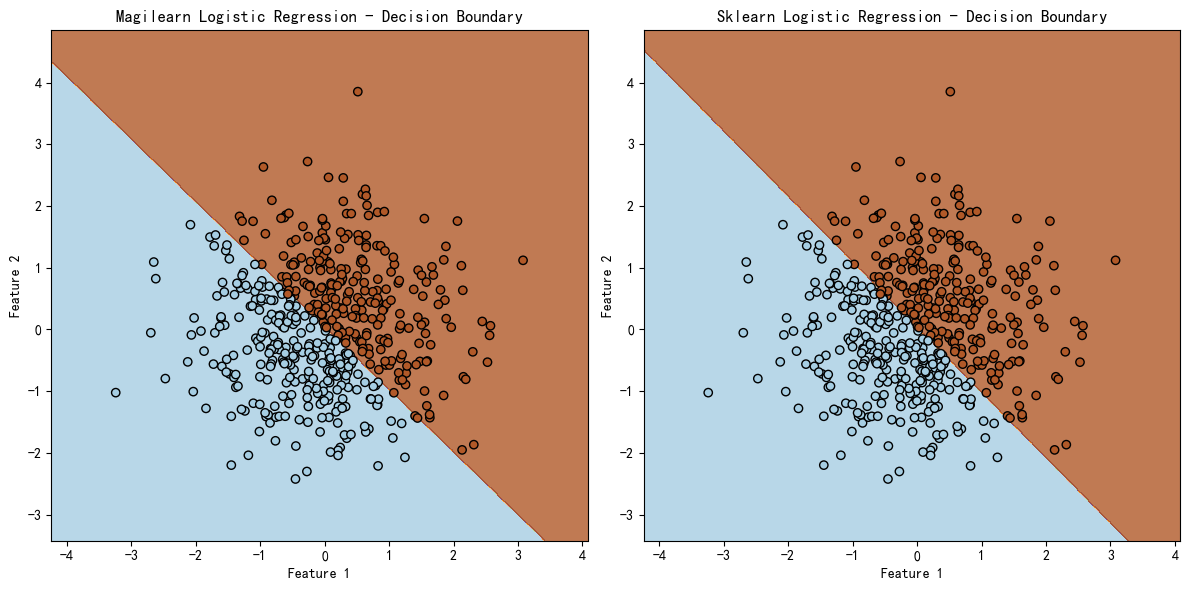

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from magilearn.datasets import load_iris, train_test_split
from magilearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from magilearn.models import LogisticRegression

# 生成数据
np.random.seed(42)
X = np.random.randn(500, 2)  # 特征数据，500个样本，2个特征
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # 使用简单的线性组合生成二分类标签

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# 使用自定义的逻辑回归模型
custom_model = LogisticRegression(learning_rate=0.001, num_iterations=10000, tol=1e-6)
custom_model.fit(X_train, y_train)

# 使用 sklearn 的逻辑回归模型
sklearn_model = SklearnLogisticRegression(solver='lbfgs', max_iter=10000, tol=1e-6)
sklearn_model.fit(X_train, y_train)

# 预测并评估模型
y_pred_custom = custom_model.predict(X_test)
y_pred_sklearn = sklearn_model.predict(X_test)

# 输出准确率
print("Magilearn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Sklearn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_sklearn))

# 可视化决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 预测决策边界
Z_custom = custom_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom = Z_custom.reshape(xx.shape)

Z_sklearn = sklearn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)

# 绘制决策边界
plt.figure(figsize=(12, 6))

# 自定义模型的决策边界
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_custom, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Magilearn Logistic Regression - Decision Boundary")

# Sklearn模型的决策边界
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_sklearn, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Sklearn Logistic Regression - Decision Boundary")

plt.tight_layout()
plt.show()


# 岭回归模型评估

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from magilearn.models import Ridge

# 生成模拟的回归数据
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=42)

# 初始化并训练岭回归模型
ridge = Ridge(alpha=1.0)  # alpha是正则化强度，默认为1.0
ridge.fit(X, y)

# 在训练集上预测
y_pred = ridge.predict(X)

# 评估模型
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# 打印评估结果
print(f"Magilearn 岭回归模型 评估结果：")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"平均绝对误差 (MAE): {mae:.4f}")
print(f"决定系数 (R² Score): {r2:.4f}")

# 可视化真实值与预测值
plt.scatter(X, y, color='blue', label='真实值', alpha=0.6)  # 添加透明度让散点更明显
plt.plot(X, y_pred, color='red', label='预测值')
plt.title('岭回归：真实值与预测值')
plt.xlabel('特征')
plt.ylabel('目标值')
plt.legend()
plt.show()


- 与sklearn对比演示

Magilearn Ridge Regression - Mean Squared Error: 417.4918
Magilearn Ridge Regression - R² Score: 0.3596
Sklearn Ridge Regression - Mean Squared Error: 417.4919
Sklearn Ridge Regression - R² Score: 0.3596


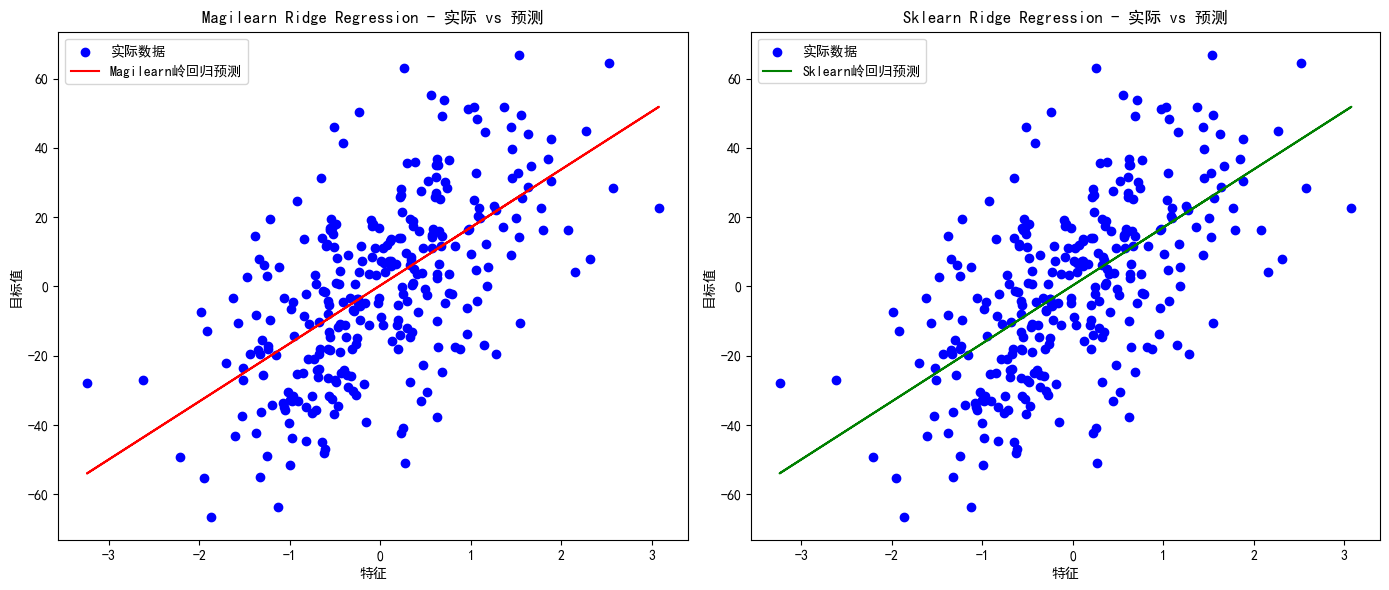

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from magilearn.models import Ridge
from sklearn.linear_model import Ridge as SklearnRidge

# 生成回归数据集
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Magilearn的岭回归模型
magi_ridge_model = Ridge(alpha=1.0, n_iters=10000)
magi_ridge_model.fit(X_train, y_train)
y_pred_magi = magi_ridge_model.predict(X_test)

# 计算Magilearn模型的均方误差和R²分数
mse_magi = mean_squared_error(y_test, y_pred_magi)
r2_magi = r2_score(y_test, y_pred_magi)

# 初始化sklearn的岭回归模型
sklearn_ridge_model = SklearnRidge(alpha=1.0)
sklearn_ridge_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_ridge_model.predict(X_test)

# 计算sklearn模型的均方误差和R²分数
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

# 输出模型评估指标
print(f"Magilearn Ridge Regression - Mean Squared Error: {mse_magi:.4f}")
print(f"Magilearn Ridge Regression - R² Score: {r2_magi:.4f}")
print(f"Sklearn Ridge Regression - Mean Squared Error: {mse_sklearn:.4f}")
print(f"Sklearn Ridge Regression - R² Score: {r2_sklearn:.4f}")

# 可视化对比图
plt.figure(figsize=(14, 6))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制实际数据点与自定义岭回归模型的回归线
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='实际数据')
plt.plot(X_test, y_pred_magi, color='red', label='Magilearn岭回归预测')
plt.title('Magilearn Ridge Regression - 实际 vs 预测')
plt.xlabel('特征')
plt.ylabel('目标值')
plt.legend()

# 绘制实际数据点与sklearn岭回归模型的回归线
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='实际数据')
plt.plot(X_test, y_pred_sklearn, color='green', label='Sklearn岭回归预测')
plt.title('Sklearn Ridge Regression - 实际 vs 预测')
plt.xlabel('特征')
plt.ylabel('目标值')
plt.legend()

plt.tight_layout()
plt.show()


# 决策树分类器模型评估

In [64]:
from magilearn.models import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 生成数据
np.random.seed(42)
X = np.random.randn(500, 2)  # 特征数据，500个样本，2个特征
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # 使用简单的线性组合生成二分类标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建并训练决策树分类器
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# 输出评估结果
print(f"Magilearn 决策树分类器 评估结果：")
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"混淆矩阵 (Confusion Matrix):\n{conf_matrix}")
print(f"ROC 曲线下面积 (ROC AUC Score): {roc_auc:.4f}")

Magilearn 决策树分类器 评估结果：
准确率 (Accuracy): 0.9733
精确率 (Precision): 0.9459
召回率 (Recall): 1.0000
混淆矩阵 (Confusion Matrix):
[[76  4]
 [ 0 70]]
ROC 曲线下面积 (ROC AUC Score): 0.9750


- 与sklearn库对比演示

Magilearn决策树准确率: 0.93
Sklearn决策树准确率: 0.94


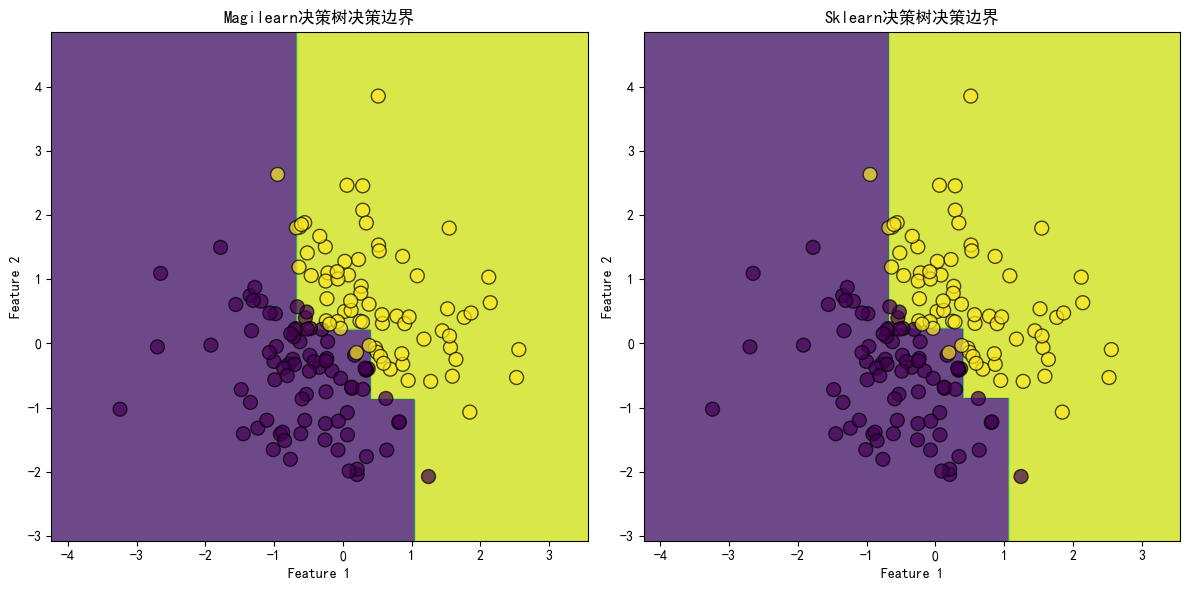

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as SklearnDTC
from magilearn.models import DecisionTreeClassifier

# 1. 生成数据
np.random.seed(42)
X = np.random.randn(500, 2)  # 特征数据，500个样本，2个特征
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # 使用简单的线性组合生成二分类标签

# 2. 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 使用自定义的决策树分类器训练并预测
custom_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=4)
custom_clf.fit(X_train, y_train)

# 4. 使用 sklearn 的决策树分类器训练并预测
sklearn_clf = SklearnDTC(max_depth=3, min_samples_split=4)
sklearn_clf.fit(X_train, y_train)

# 5. 输出准确率
y_pred_custom = custom_clf.predict(X_test)
y_pred_sklearn = sklearn_clf.predict(X_test)

print(f"Magilearn决策树准确率: {accuracy_score(y_test, y_pred_custom):.2f}")
print(f"Sklearn决策树准确率: {accuracy_score(y_test, y_pred_sklearn):.2f}")

# 6. 绘制决策边界
def plot_decision_boundary(clf, X, y, ax, title):
    h = .02  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制决策边界
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black', s=100, alpha=0.7, facecolors='none')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# 7. 可视化决策边界
plt.figure(figsize=(12, 6))

# 绘制 Magilearn 决策树的决策边界
plt.subplot(1, 2, 1)
plot_decision_boundary(custom_clf, X_test, y_test, plt.gca(), 'Magilearn决策树决策边界')

# 绘制 Sklearn 决策树的决策边界
plt.subplot(1, 2, 2)
plot_decision_boundary(sklearn_clf, X_test, y_test, plt.gca(), 'Sklearn决策树决策边界')

plt.tight_layout()
plt.show()


# 决策树回归器模型评估

In [62]:
import numpy as np
from magilearn.models import DecisionTreeRegressor  # 假设已实现的决策树回归器
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 生成一个简单的回归数据集
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建并训练决策树回归器
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
regressor.fit(X_train, y_train)

# 预测测试集
y_pred = regressor.predict(X_test)

# 计算评估指标
mae = mean_absolute_error(y_test, y_pred)  # 平均绝对误差
mse = mean_squared_error(y_test, y_pred)  # 均方误差
rmse = np.sqrt(mse)  # 均方根误差
r2 = r2_score(y_test, y_pred)  # R^2（决定系数）

# 输出评估结果
print(f"Magilearn 决策树回归器 评估结果：")
print(f"平均绝对误差 (MAE): {mae:.4f}")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")
print(f"决定系数 (R^2 Score): {r2:.4f}")

Magilearn 决策树回归器 评估结果：
平均绝对误差 (MAE): 114.6500
均方误差 (MSE): 20054.6128
均方根误差 (RMSE): 141.6143
决定系数 (R^2 Score): 0.4745


- 与sklearn库对比演示


测试集上的自定义回归器 MSE: 0.2278
测试集上的 sklearn 回归器 MSE: 0.2395



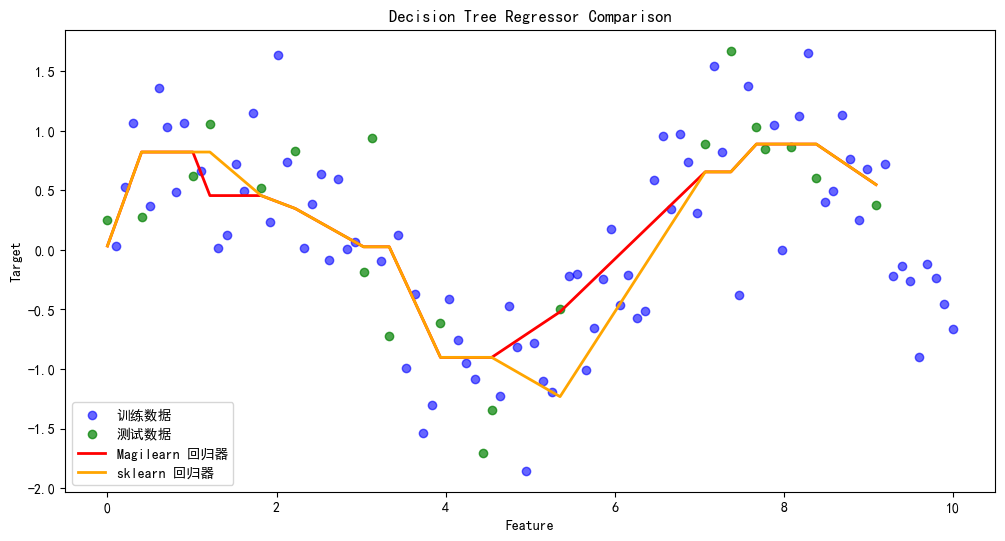

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from magilearn.models import DecisionTreeRegressor  # 自定义回归器
from sklearn.tree import DecisionTreeRegressor as SklearnDTR  # sklearn 的回归器

# 1. 生成模拟的回归数据
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 特征数据
noise = np.random.normal(0, 0.5, size=100)  # 添加噪声
y = np.sin(X).ravel() + noise  # 目标值

# 2. 拆分数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 创建两个回归器
# 自定义的回归器
my_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
my_regressor.fit(X_train, y_train)

# sklearn 提供的回归器
sklearn_regressor = SklearnDTR(max_depth=5, min_samples_split=5)
sklearn_regressor.fit(X_train, y_train)

# 4. 在测试集上进行预测
my_y_pred = my_regressor.predict(X_test)
sklearn_y_pred = sklearn_regressor.predict(X_test)

# 5. 评价两款模型的性能
my_mse = mean_squared_error(y_test, my_y_pred)
sklearn_mse = mean_squared_error(y_test, sklearn_y_pred)

print(f"\n测试集上的Magilearn回归器 MSE: {my_mse:.4f}")
print(f"测试集上的 sklearn 回归器 MSE: {sklearn_mse:.4f}\n")

# 6. 可视化两个模型的比较
plt.figure(figsize=(12, 6))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 训练集的真实值
plt.scatter(X_train, y_train, color="blue", label="训练数据", alpha=0.6)

# 测试集的真实值
plt.scatter(X_test, y_test, color="green", label="测试数据", alpha=0.7)

# 自定义回归器的预测值
X_sorted = np.sort(X_test, axis=0)  # 排序 X 便于绘图
my_y_pred_sorted = my_regressor.predict(X_sorted)
plt.plot(X_sorted, my_y_pred_sorted, color="red", label="Magilearn 回归器", linewidth=2)

# sklearn 回归器的预测值
sklearn_y_pred_sorted = sklearn_regressor.predict(X_sorted)
plt.plot(X_sorted, sklearn_y_pred_sorted, color="orange", label="sklearn 回归器", linewidth=2)

# 图片设置
plt.title("Decision Tree Regressor Comparison")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


# 随机森林模型评估

In [60]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from magilearn.models import RandomForestClassifier

# 生成一个简单的二分类数据集
np.random.seed(42)
X = np.random.randn(500, 2)  # 特征数据，500个样本，2个特征
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # 使用简单的线性组合生成二分类标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建并训练随机森林分类器
rf_clf = RandomForestClassifier(n_estimators=50, max_features=2)
rf_clf.fit(X_train, y_train)

# 预测测试集
y_pred = rf_clf.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 输出评估结果
print(f"Magilearn 随机森林分类器 评估结果：")
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确度 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1 分数 (F1 Score): {f1:.4f}")
print(f"混淆矩阵 (Confusion Matrix):\n{conf_matrix}")



Magilearn 随机森林分类器 评估结果：
准确率 (Accuracy): 0.9733
精确度 (Precision): 0.9459
召回率 (Recall): 1.0000
F1 分数 (F1 Score): 0.9722
混淆矩阵 (Confusion Matrix):
[[76  4]
 [ 0 70]]


- 与sklearn库对比演示

Magilearn 随机森林准确率: 0.97
Sklearn 随机森林准确率: 0.99


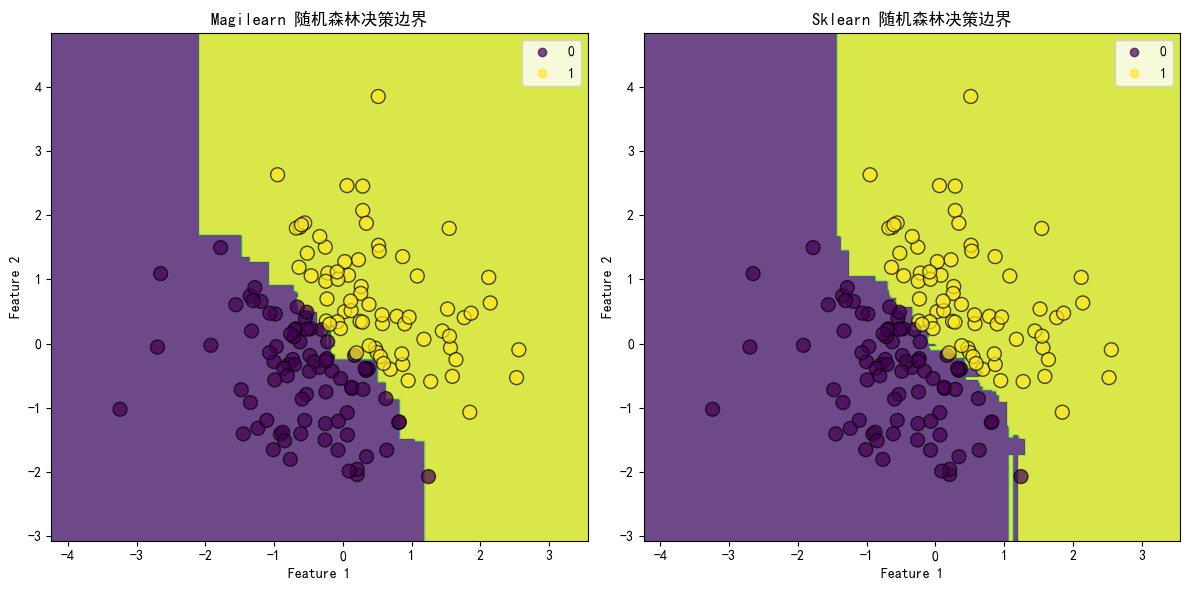

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as SklearnRFC
from magilearn.models import RandomForestClassifier

# 1. 生成模拟的二分类数据
np.random.seed(42)
X = np.random.randn(500, 2)  # 特征数据，500个样本，2个特征
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # 使用简单的线性组合生成二分类标签

# 2. 拆分数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 使用自定义的随机森林分类器训练并预测
custom_rf_clf = RandomForestClassifier(n_estimators=10, max_features=2)
custom_rf_clf.fit(X_train, y_train)
y_pred_custom = custom_rf_clf.predict(X_test)

# 4. 使用 sklearn 的随机森林分类器训练并预测
sklearn_rf_clf = SklearnRFC(n_estimators=10, max_features=2)
sklearn_rf_clf.fit(X_train, y_train)
y_pred_sklearn = sklearn_rf_clf.predict(X_test)

# 5. 输出准确率
print(f"Magilearn 随机森林准确率: {accuracy_score(y_test, y_pred_custom):.2f}")
print(f"Sklearn 随机森林准确率: {accuracy_score(y_test, y_pred_sklearn):.2f}")

# 6. 绘制决策边界
def plot_decision_boundary(clf, X, y, ax):
    h = .02  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制决策边界和数据点
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black', s=100, alpha=0.7)
    return scatter

# 7. 可视化决策边界和分类结果
plt.figure(figsize=(12, 6))

# 绘制 Magilearn 随机森林的决策边界
plt.subplot(1, 2, 1)
scatter = plot_decision_boundary(custom_rf_clf, X_test, y_test, plt.gca())
plt.title('Magilearn 随机森林决策边界')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(*scatter.legend_elements(), loc='upper right')

# 绘制 Sklearn 随机森林的决策边界
plt.subplot(1, 2, 2)
scatter = plot_decision_boundary(sklearn_rf_clf, X_test, y_test, plt.gca())
plt.title('Sklearn 随机森林决策边界')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(*scatter.legend_elements(), loc='upper right')

plt.tight_layout()
plt.show()


# 梯度提升分类器

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from magilearn.models import GradientBoostingClassifier

# 1. 生成模拟的二分类数据
np.random.seed(42)
X = np.random.randn(500, 2)  # 特征数据，500个样本，2个特征
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # 使用简单的线性组合生成二分类标签

# 2. 拆分数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 自定义梯度提升分类器训练
my_gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)
my_gbc.fit(X_train, y_train)
my_y_pred = my_gbc.predict(X_test)
my_proba = my_gbc.predict_proba(X_test)[:, 1]  # 正类概率

# 4. 计算多个评价指标
my_acc = accuracy_score(y_test, my_y_pred)
my_auc = roc_auc_score(y_test, my_proba)
my_precision = precision_score(y_test, my_y_pred)
my_recall = recall_score(y_test, my_y_pred)
my_f1 = f1_score(y_test, my_y_pred)

# 打印评估结果
print(f"Magilearn GradientBoostingClassifier 评估结果：")
print(f"准确率 (Accuracy): {my_acc:.4f}")
print(f"AUC (Area Under ROC Curve): {my_auc:.4f}")
print(f"精确度 (Precision): {my_precision:.4f}")
print(f"召回率 (Recall): {my_recall:.4f}")
print(f"F1分数 (F1 Score): {my_f1:.4f}")


Magilearn GradientBoostingClassifier 评估结果：
准确率 (Accuracy): 0.9400
AUC (Area Under ROC Curve): 0.9938
精确度 (Precision): 0.9296
召回率 (Recall): 0.9429
F1分数 (F1 Score): 0.9362


- 与sklearn库对比演示

Magilearn GradientBoostingClassifier 准确率: 0.9600, AUC: 0.9932
Sklearn GradientBoostingClassifier 准确率: 0.9767, AUC: 0.9980


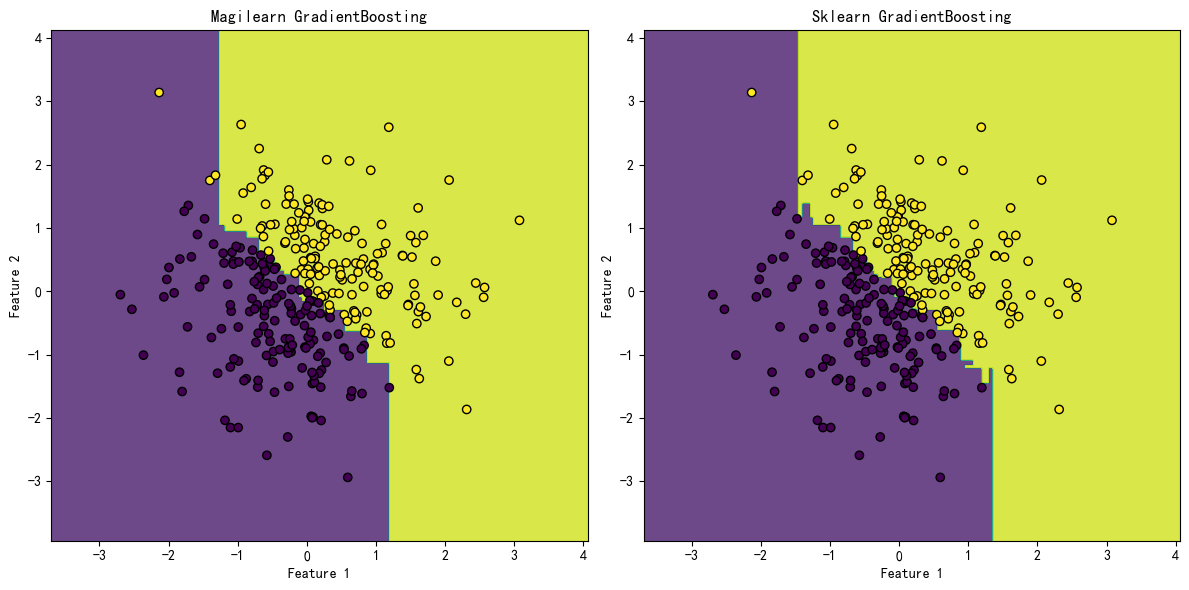

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier as SklearnGBC
from magilearn.models import GradientBoostingClassifier

# 1. 生成模拟的二分类数据
np.random.seed(42)
X = np.random.randn(1000, 2)  # 特征数据，1000个样本，2个特征
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # 使用简单的线性组合生成二分类标签

# 2. 拆分数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 自定义梯度提升分类器训练
my_gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3)
my_gbc.fit(X_train, y_train)
my_y_pred = my_gbc.predict(X_test)
my_proba = my_gbc.predict_proba(X_test)[:, 1]  # 正类概率

# 4. Sklearn 的梯度提升分类器训练
sk_gbc = SklearnGBC(n_estimators=50, learning_rate=0.1, max_depth=3)
sk_gbc.fit(X_train, y_train)
sk_y_pred = sk_gbc.predict(X_test)
sk_proba = sk_gbc.predict_proba(X_test)[:, 1]

# 5. 评价两个模型的性能
my_acc = accuracy_score(y_test, my_y_pred)
sk_acc = accuracy_score(y_test, sk_y_pred)

my_auc = roc_auc_score(y_test, my_proba)
sk_auc = roc_auc_score(y_test, sk_proba)

print(f"Magilearn GradientBoostingClassifier 准确率: {my_acc:.4f}, AUC: {my_auc:.4f}")
print(f"Sklearn GradientBoostingClassifier 准确率: {sk_acc:.4f}, AUC: {sk_auc:.4f}")

# 6. 可视化两个模型的比较
plt.figure(figsize=(12, 6))

# 设置中文字体（适用于中文环境，非必要可以注释掉）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制决策边界
def plot_decision_boundary(model, X, y, title, subplot):
    h = 0.02  # 网格间隔
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, subplot)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", marker="o")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# 自定义 GBC 的决策边界
plot_decision_boundary(my_gbc, X_test, y_test, "Magilearn GradientBoosting", 1)

# Sklearn GBC 的决策边界
plot_decision_boundary(sk_gbc, X_test, y_test, "Sklearn GradientBoosting", 2)

plt.tight_layout()
plt.show()


# K-means 模型评估

Magilearn KMeans 评估结果：
轮廓系数 (Silhouette Score): 0.7911
聚类内部的均方误差 (WCSS): 948.8903
调整兰德指数 (ARI): 1.0000


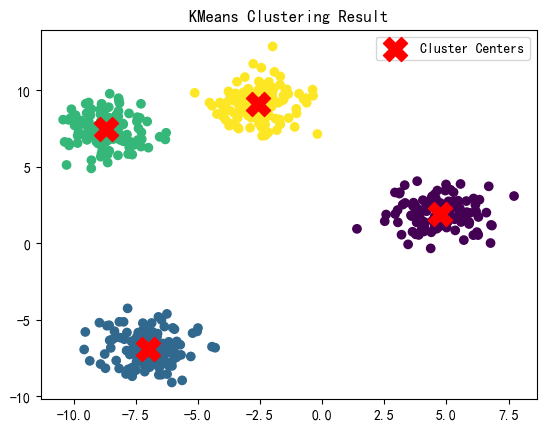

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.metrics import adjusted_rand_score

# 导入 KMeans 模型
from magilearn.models import KMeans

# 生成样本数据
X, y_true = make_blobs(n_samples=500, centers=4, random_state=42)

# 初始化并训练 KMeans 模型
kmeans = KMeans(n_clusters=4, max_iters=300, tol=1e-4, random_state=42)
kmeans.fit(X)

# 获取预测标签
y_pred = kmeans.predict(X)

# 评估模型
print(f"Magilearn KMeans 评估结果：")
# 1. 轮廓系数 (Silhouette Score)
sil_score = silhouette_score(X, y_pred)
print(f"轮廓系数 (Silhouette Score): {sil_score:.4f}")

# 2. 聚类内部的均方误差 (WCSS)
distances = np.linalg.norm(X - kmeans.cluster_centers_[y_pred], axis=1)
wcss = np.sum(distances**2)
print(f"聚类内部的均方误差 (WCSS): {wcss:.4f}")

# 3. 调整兰德指数 (Adjusted Rand Index, ARI)
# 这里使用真实标签 y_true 来计算 ARI
ari_score = adjusted_rand_score(y_true, y_pred)
print(f"调整兰德指数 (ARI): {ari_score:.4f}")

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Cluster Centers')
plt.title('KMeans Clustering Result')
plt.legend()
plt.show()


- 与sklearn库对比演示

Magilearn KMeans 轮廓系数 (Silhouette Score): 0.8715
Magilearn KMeans 聚类内部的均方误差 (WCSS):  44.1274
Magilearn KMeans 调整兰德指数 (ARI): 1.0000
Magilearn KMeans Cluster Centers:
 [[ 4.50235462  2.13138331]
 [-6.87333201 -6.56769057]
 [-2.65139471  8.98989139]]
Sklearn KMeans 轮廓系数（Silhouette Score）: 0.8715
Sklearn KMeans 聚类内部的均方误差 (WCSS): 44.1274
Sklearn KMeans 调整兰德指数 (ARI): 1.0000
Sklearn KMeans Cluster Centers:
 [[-2.65139471  8.98989139]
 [-6.87333201 -6.56769057]
 [ 4.50235462  2.13138331]]


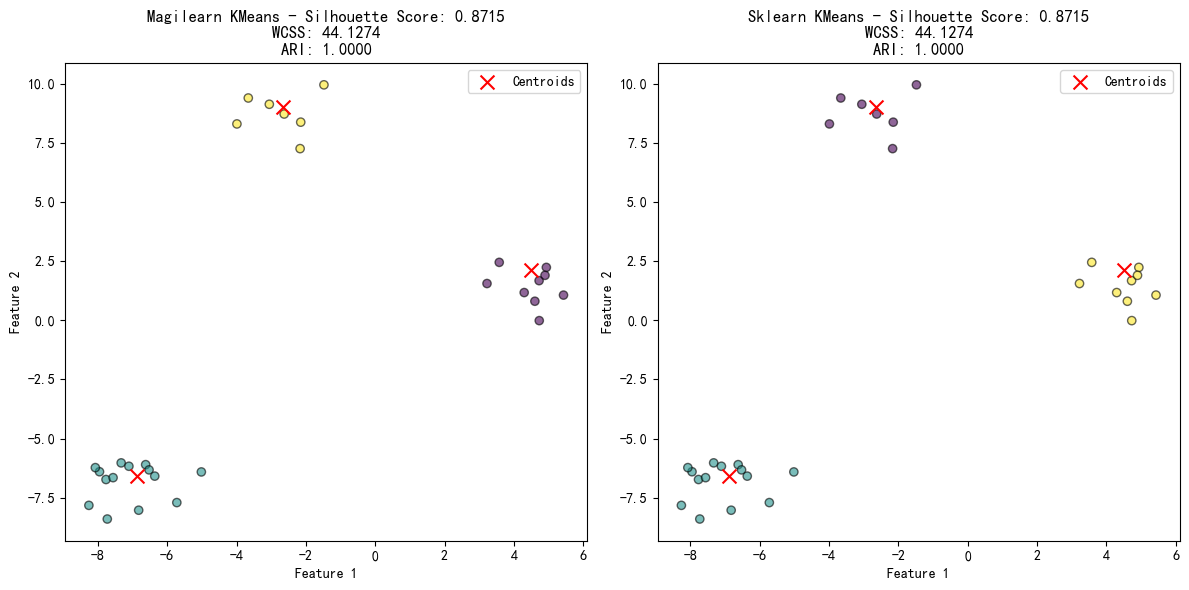

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, adjusted_rand_score as ari
from sklearn.cluster import KMeans as SklearnKMeans
from magilearn.models import KMeans
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # 指定使用 4 个核心

# 生成聚类数据集
X, y_true = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)

# 实例化并训练自定义 KMeans 模型
model_custom = KMeans(n_clusters=3, random_state=42)
model_custom.fit(X_train)

# 对测试集进行预测
y_pred_custom = model_custom.predict(X_test)

# 计算自定义模型的轮廓系数
silhouette_custom = silhouette_score(X_test, y_pred_custom)
print(f"Magilearn KMeans 轮廓系数 (Silhouette Score): {silhouette_custom:.4f}")

# 计算自定义模型的聚类内部的均方误差 (WCSS)
distances_custom = np.linalg.norm(X_test - model_custom.cluster_centers_[y_pred_custom], axis=1)
wcss_custom = np.sum(distances_custom**2)
print(f"Magilearn KMeans 聚类内部的均方误差 (WCSS):  {wcss_custom:.4f}")

# 计算自定义模型的调整兰德指数 (ARI)
ari_custom = ari(y_test, y_pred_custom)  # 真实标签是 y_test
print(f"Magilearn KMeans 调整兰德指数 (ARI): {ari_custom:.4f}")
print("Magilearn KMeans Cluster Centers:\n", model_custom.cluster_centers_)

# 实例化并训练 sklearn 的 KMeans 模型
model_sklearn = SklearnKMeans(n_clusters=3, random_state=42)
model_sklearn.fit(X_train)

# 对测试集进行预测
y_pred_sklearn = model_sklearn.predict(X_test)

# 计算 sklearn 模型的轮廓系数
silhouette_sklearn = silhouette_score(X_test, y_pred_sklearn)
print(f"Sklearn KMeans 轮廓系数（Silhouette Score）: {silhouette_sklearn:.4f}")

# 计算 sklearn 模型的聚类内部的均方误差 (WCSS)
distances_sklearn = np.linalg.norm(X_test - model_sklearn.cluster_centers_[y_pred_sklearn], axis=1)
wcss_sklearn = np.sum(distances_sklearn**2)
print(f"Sklearn KMeans 聚类内部的均方误差 (WCSS): {wcss_sklearn:.4f}")

# 计算 sklearn 模型的调整兰德指数 (ARI)
ari_sklearn = ari(y_test, y_pred_sklearn)  # 真实标签是 y_test
print(f"Sklearn KMeans 调整兰德指数 (ARI): {ari_sklearn:.4f}")
print("Sklearn KMeans Cluster Centers:\n", model_sklearn.cluster_centers_)

# 可视化对比
plt.figure(figsize=(12, 6))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 自定义 KMeans 聚类结果
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_custom, cmap='viridis', marker='o', edgecolor='k', alpha=0.6)
plt.scatter(model_custom.cluster_centers_[:, 0], model_custom.cluster_centers_[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title(f"Magilearn KMeans - Silhouette Score: {silhouette_custom:.4f}\nWCSS: {wcss_custom:.4f}\nARI: {ari_custom:.4f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Sklearn KMeans 聚类结果
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn, cmap='viridis', marker='o', edgecolor='k', alpha=0.6)
plt.scatter(model_sklearn.cluster_centers_[:, 0], model_sklearn.cluster_centers_[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title(f"Sklearn KMeans - Silhouette Score: {silhouette_sklearn:.4f}\nWCSS: {wcss_sklearn:.4f}\nARI: {ari_sklearn:.4f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()